In [1]:
%matplotlib inline 
import preprocessing_utils
from datetime import datetime, timedelta

In [2]:
num_timesteps_input = 8 # 40 minutes
num_timesteps_output = 4 # 20 minutes

In [3]:
raw_trunc_dir = "./data/raw/trunc/"
process_dir = "./data/processed/"

preprocessing_utils.processed(raw_trunc_dir, process_dir, overwrite=False)
A, X, metadata, cat2index, timestamps, means, stds = preprocessing_utils.load(process_dir)

[0.19746497665110074, 0.001067378252168112, 0.8014676450967312]
[0.6793587174348698, 0.16032064128256512, 0.16032064128256512]


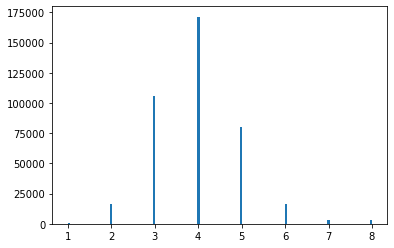

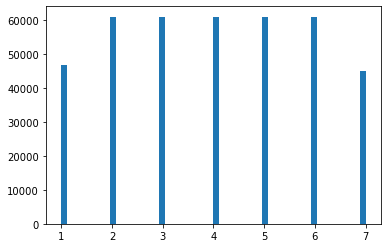

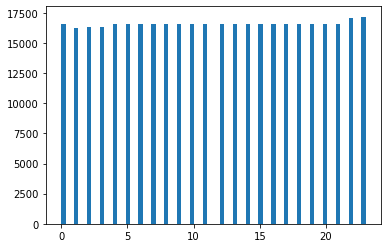

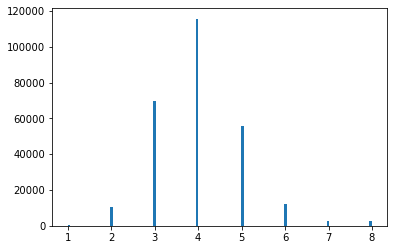

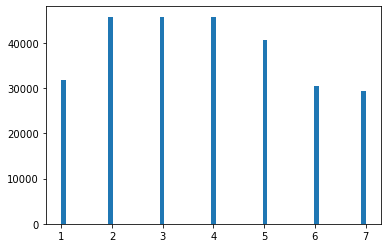

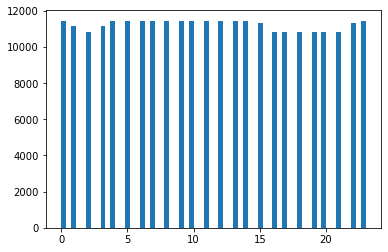

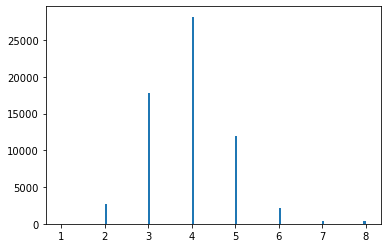

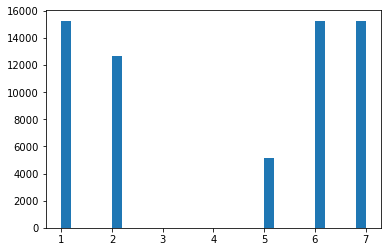

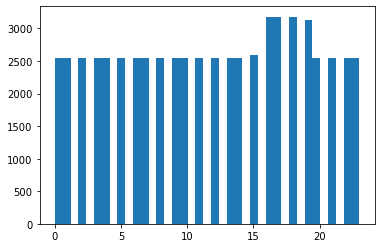

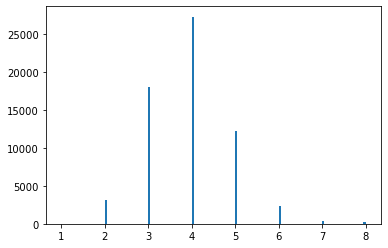

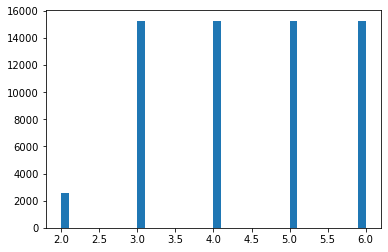

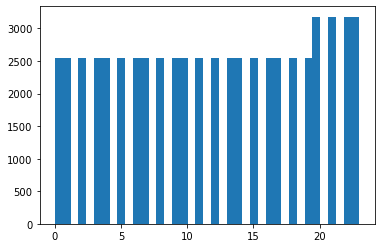

In [6]:
data_chunks = preprocessing_utils.find_consecutive_chunks(timestamps, 9)
print(preprocessing_utils.chunk_len_proportion(data_chunks))
subchunks = preprocessing_utils.sub_chunk(data_chunks[2], [0.6, 0.2, 0.2])
train_indices = data_chunks[0] + subchunks[0]
val_indices = subchunks[1]
test_indices = subchunks[2]
print(preprocessing_utils.chunk_len_proportion([train_indices, val_indices, test_indices]))
train_samples = preprocessing_utils.extract_chunk(X, train_indices)
val_samples = preprocessing_utils.extract_chunk(X, val_indices)
test_samples = preprocessing_utils.extract_chunk(X, test_indices)
preprocessing_utils.distribution(preprocessing_utils.denormalize(X, stds, means), [0, 3, 4])
preprocessing_utils.distribution(preprocessing_utils.denormalize(train_samples, stds, means), [0, 3, 4])
preprocessing_utils.distribution(preprocessing_utils.denormalize(val_samples, stds, means), [0, 3, 4])
preprocessing_utils.distribution(preprocessing_utils.denormalize(test_samples, stds, means), [0, 3, 4])